#  FRAUD DETECTION using Neural Network & comparision with Machine Learning
##### Objective:
FRAUD DETECTION

Approach:
Here the note book contains 4 sections

1) Exploratory Data analysis

2) Comparision with ML regression/classification Models vs Neural network model

3) Improving the NN model

4) Conclusion

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import datetime as dt
import calendar,warnings,itertools,matplotlib,keras,shutil

import statsmodels.api as sm
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,f1_score

import xgboost as xgb

import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from IPython.core import display as ICD


#Hiding the warnings
warnings.filterwarnings('ignore') 

### Fetching Data 

In [1]:
!pwd

/Users/vidyadharbendre/nn_workspace/learn_neural_network_using_examples/jupyter_notebooks


In [26]:
dataset=pd.read_csv(r"/Users/vidyadharbendre/nn_workspace/learn_neural_network_using_examples/data/DataCoSupplyChainDataset.csv",header= 0,encoding= 'unicode_escape')
dataset.head(5)# Checking 5 rows in dataset

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [27]:
dataset.shape

(180519, 53)

### Checking the basic info about the data

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

### Checking the null values in the dataset

In [29]:
dataset.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


### Data Cleaning

The data consists of some missing values from `Customer Lname, Product Description, Order Zipcode and, Customer Zipcode` which should be `removed or replaced` before proceeding with the analysis. And also, since there is a chance different customers might have the same first name or same last name a new column with ‘customer full name’ is created to avoid any ambiguities.



In [30]:
# # Adding first name and last name together to create new column
# dataset['Customer Full Name'] = dataset['Customer Fname'].astype(str)+dataset['Customer Lname'].astype(str)

 To make it easier for analysis some unimportant columns are dropped

In [31]:
data=dataset.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)
data.shape

(180519, 41)

In [32]:
data['Customer Zipcode']=data['Customer Zipcode'].fillna(0)

### Data analysis using Visualisation

#### Heatmap for correlation matrix

<Axes: >

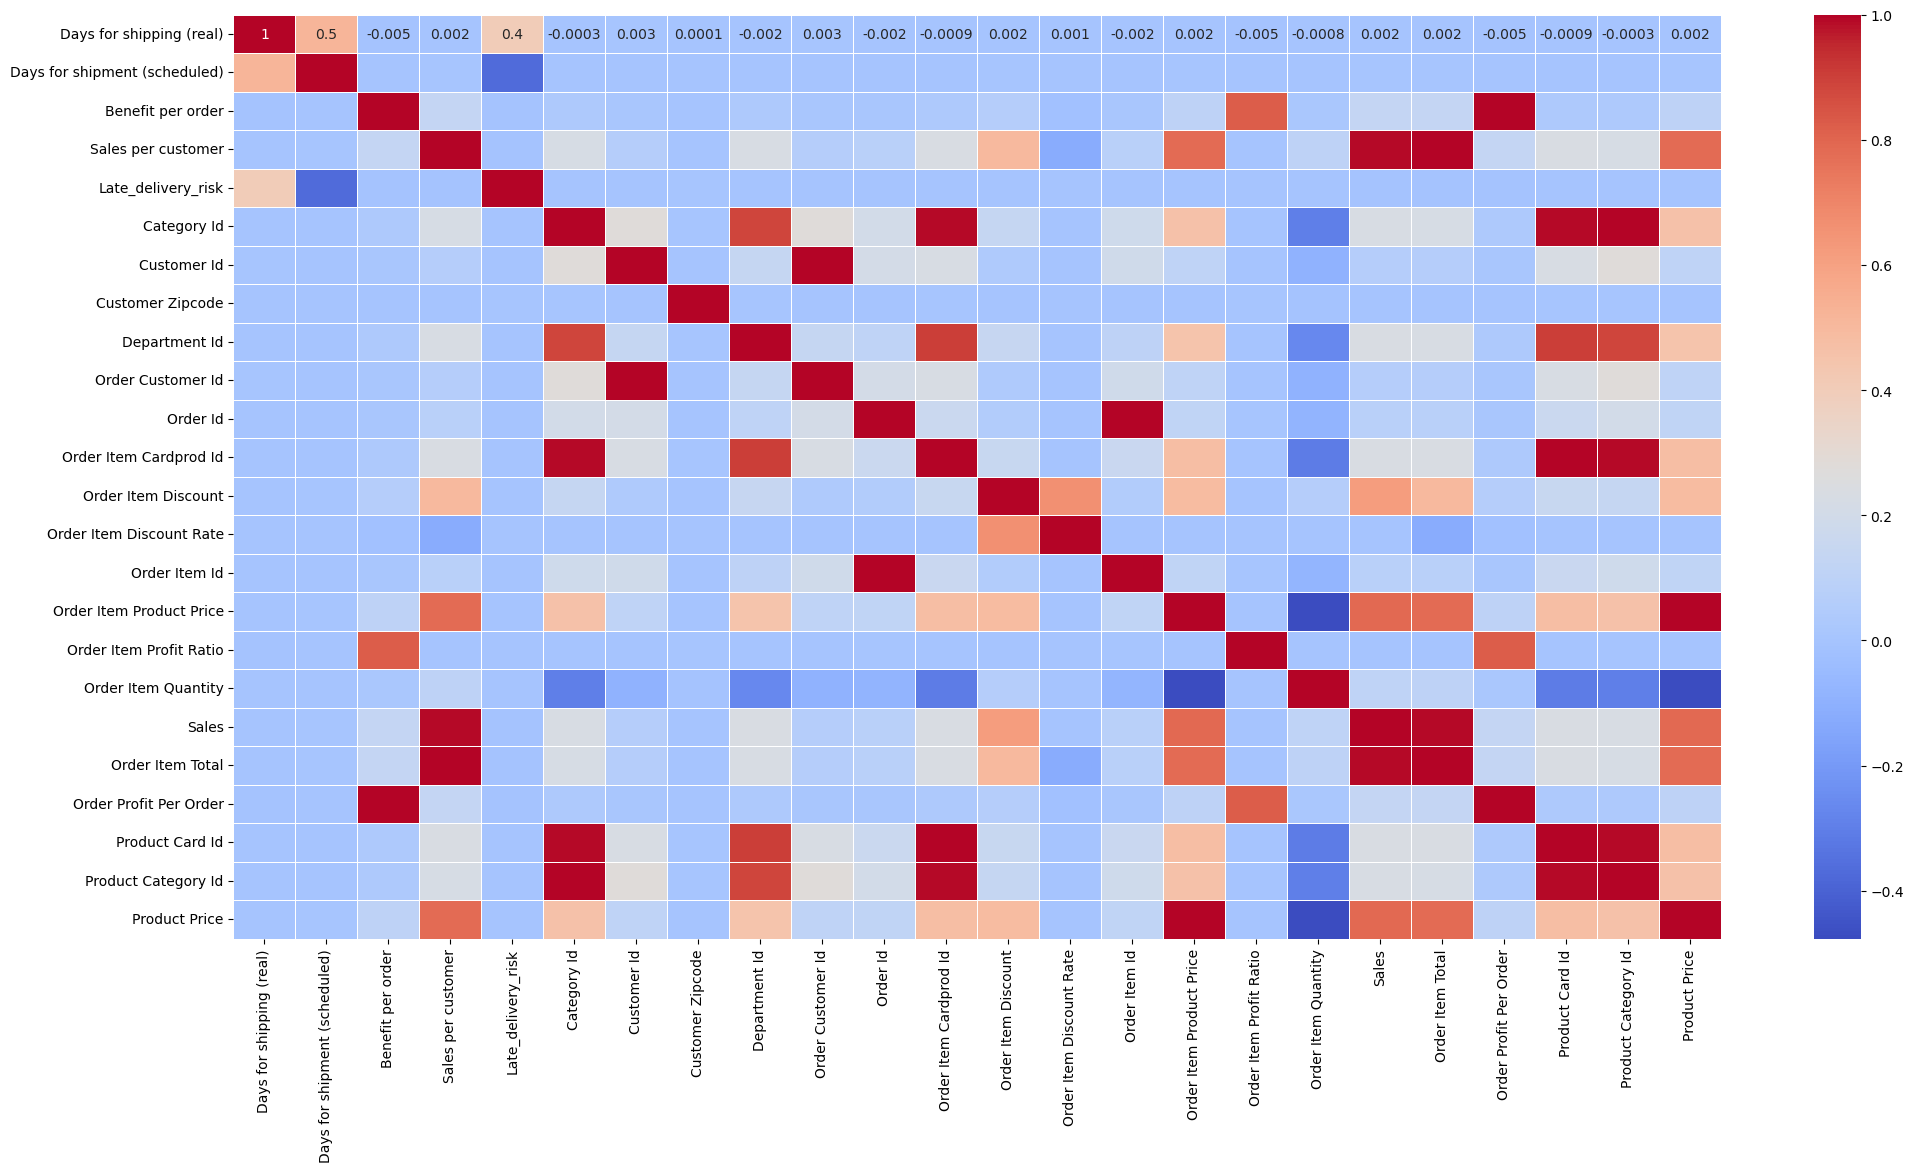

In [33]:
fig, ax = plt.subplots(figsize=(24,12))
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm') # Heatmap for correlation matrix

#### Observation:
- We can observe that product price price has high correlation with Sales,Order Item Total.

- Finding which payment method is used to conduct frauds can be useful to prevent fraud from happening in future

In [34]:
#Checking type of payment used to conduct fraud other than Transfer
xyz = data[(data['Type'] != 'TRANSFER')&(data['Order Status'] == 'SUSPECTED_FRAUD')]
xyz['Order Region'].value_counts()

Series([], Name: Order Region, dtype: int64)

#### Observation:
- It can be clearly seen that there are no frauds conducted with DEBIT,CASH,PAYMENT methods so all the suspected fraud orders are made using wire transfer probably from abroad. Which region and what product is being suspected to the fraud the most?

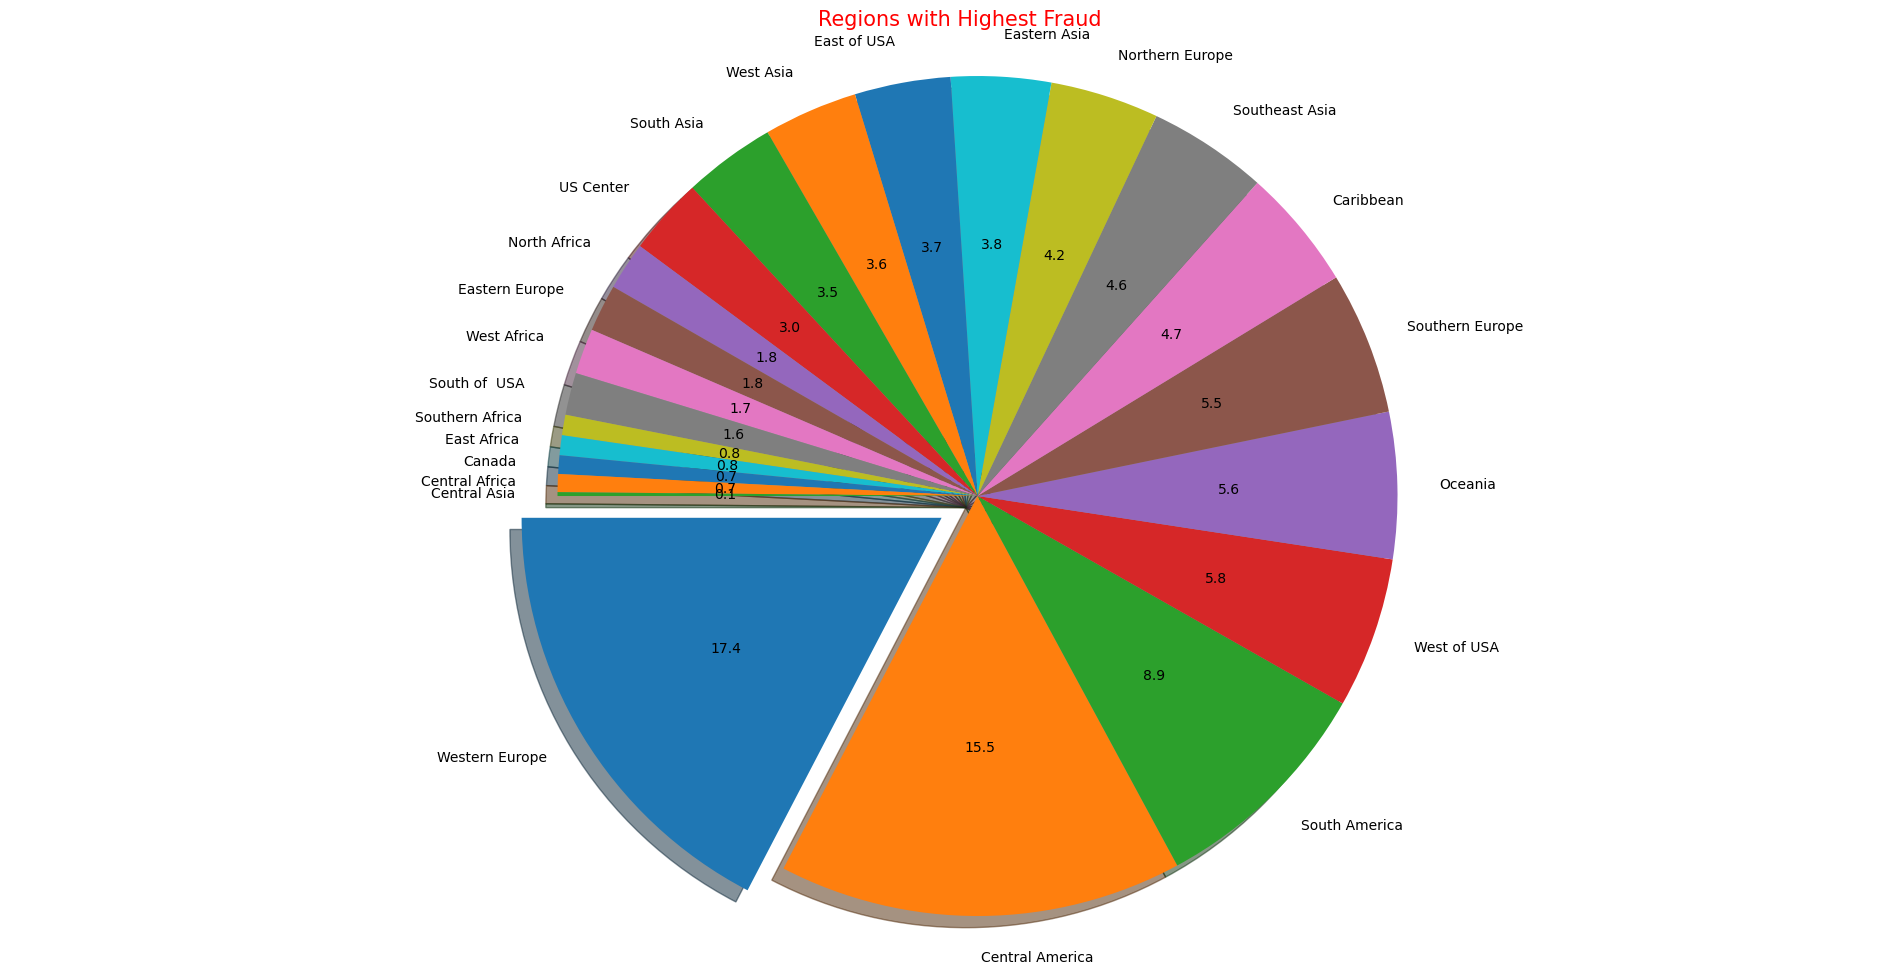

In [35]:
high_fraud = data[(data['Order Status'] == 'SUSPECTED_FRAUD') & (data['Type'] == 'TRANSFER')]#separating orders with suspected fraud
#Plotting pie chart with respect to order region
fraud=high_fraud['Order Region'].value_counts().plot.pie(figsize=(24,12),
      startangle=180, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),autopct='%.1f',shadow=True,)
plt.title("Regions with Highest Fraud",size=15,color='r') # Plotting title
plt.ylabel(" ")
fraud.axis('equal') 
plt.show()

#### Observation:
- It can be observed that highest number of suspected fraud orders are from Western Europe which is approximately 17.4% of total orders followed by Central America with 15.5%. Which product is being suspected fraud the most?

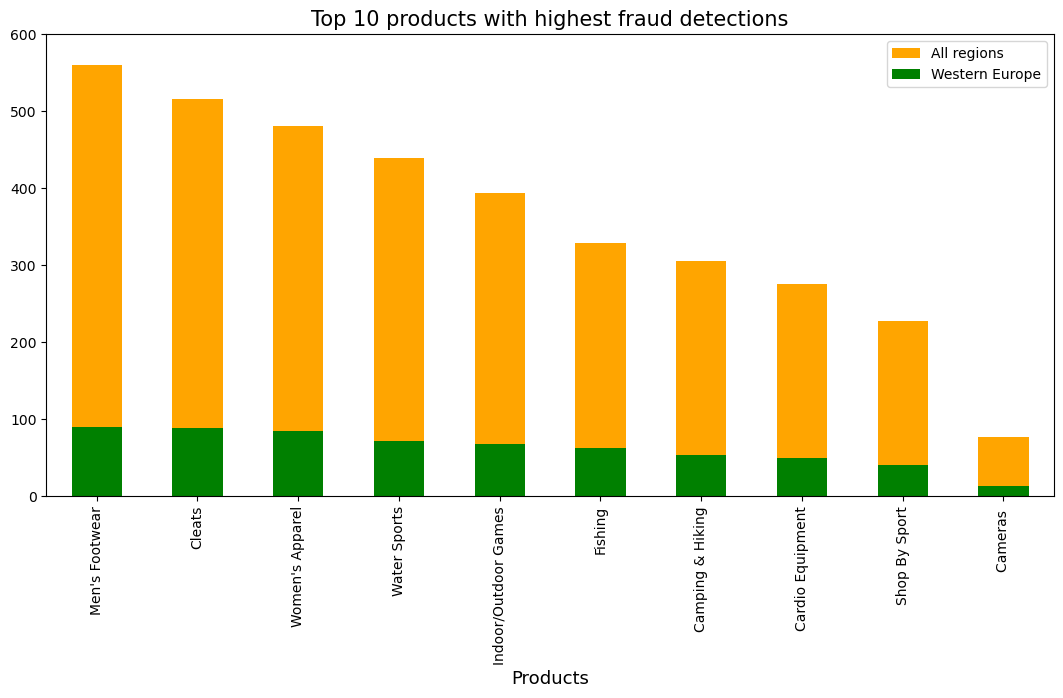

In [64]:
high_fraud1 = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] # 
high_fraud2 = data[(data['Order Status'] == 'SUSPECTED_FRAUD') &(data['Order Region'] == 'Western Europe')]
#Plotting bar chart for top 10 most suspected fraud department in all regions
fraud1=high_fraud1['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(13,6), title="Fraud Category",color='orange')
#Plotting bar chart for top 10 most suspected fraud department in Western Europe
fraud2=high_fraud2['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(13,6), title="Fraud product in Western Europe",color='green')
plt.legend(["All regions", "Western Europe"])
plt.title("Top 10 products with highest fraud detections", size=15)
plt.xlabel("Products", size=13)
plt.ylim(0,600)
plt.show()

#### Observation:
- It is very suprising to see that cleats department is being suspected to fraud the most followed by Men's footwear in all the regions and also in Western Europe.Which customers are conducting all these fraud?



In [65]:
# #Filtering out suspected fruad orders
# cus = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] 
# #Top 10 customers with most fraud
# cus['Customer Full Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 Highest Fraud Customers")

#### Observation:
- The customer named Mary Smith alone was responible for trying to conduct fraud 528 times

### Data Splitting 

In [66]:
#Calculating total price for which each order
data['TotalPrice'] = data['Order Item Quantity'] * data['Order Item Total']# Multiplying item price * Order quantity
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

In [67]:
train_data=data.copy()

Two new columns are created for orders with suspected fraud and late delivery making them into binary classification, which in turn helps to measure performance of different models better.

In [68]:
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)

Now to measure machine models accurately all the columns with repeated values are dropped like late_delivery_risk column because, it is known all the products with late delivery risk are delivered late. And Order Status column because, a new column for fraud detection is created there is a chance machine learning model might take values directly from these columns to predict output.

In [69]:
#Dropping columns with repeated values
train_data.drop(['Delivery Status','Late_delivery_risk','Order Status','order date (DateOrders)'], axis=1, inplace=True)

It is important to check the type of variables in the data because machine learning models can only be trained with numerical values.

In [70]:
train_data.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Segment                  object
Customer State                    object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Produ

### Feature Encoding 

In [71]:
# create the Labelencoder object
le =LabelEncoder()
#convert the categorical columns into numeric
train_data['Customer Country']  = le.fit_transform(train_data['Customer Country'])
train_data['Market']            = le.fit_transform(train_data['Market'])
train_data['Type']              = le.fit_transform(train_data['Type'])
train_data['Product Name']      = le.fit_transform(train_data['Product Name'])
train_data['Customer Segment']  = le.fit_transform(train_data['Customer Segment'])
train_data['Customer State']    = le.fit_transform(train_data['Customer State'])
train_data['Order Region']      = le.fit_transform(train_data['Order Region'])
train_data['Order City']        = le.fit_transform(train_data['Order City'])
train_data['Category Name']     = le.fit_transform(train_data['Category Name'])
train_data['Customer City']     = le.fit_transform(train_data['Customer City'])
train_data['Department Name']   = le.fit_transform(train_data['Department Name'])
train_data['Order State']       = le.fit_transform(train_data['Order State'])
train_data['Shipping Mode']     = le.fit_transform(train_data['Shipping Mode'])
#train_data['order_week_day']    = le.fit_transform(train_data['order_week_day'])
train_data['Order Country']     = le.fit_transform(train_data['Order Country'])
# train_data['Customer Full Name']= le.fit_transform(train_data['Customer Full Name'])

#display the initial records
train_data.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Order Profit Per Order,Order Region,Order State,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,TotalPrice,fraud
0,1,3,4,91.250000,314.640015,73,40,66,1,20755,...,91.250000,15,475,1360,73,78,327.75,3,314.640015,0
1,3,5,4,-249.089996,311.359985,73,40,66,1,19492,...,-249.089996,13,841,1360,73,78,327.75,3,311.359985,0
2,0,4,4,-247.779999,309.720001,73,40,452,0,19491,...,-247.779999,13,841,1360,73,78,327.75,3,309.720001,0
3,1,3,4,22.860001,304.809998,73,40,285,0,19490,...,22.860001,11,835,1360,73,78,327.75,3,304.809998,0
4,2,2,4,134.210007,298.250000,73,40,66,1,19489,...,134.210007,11,835,1360,73,78,327.75,3,298.250000,0


In [72]:
#All columns expect fraud
xf=train_data.loc[:, train_data.columns != 'fraud']
#Only fraud column
yf=train_data['fraud']

xf_train, xf_test,yf_train,yf_test = train_test_split(xf,yf,test_size = 0.2,random_state = 42)

### Feature Scaling

Since there are so many different variables with different ranges standard scaler is used to standardize total the data so it is internally consistent before training the data with machine learning.

In [73]:
sc = StandardScaler()

In [74]:
sc.fit_transform(xf_train)

array([[ 1.33282462, -0.92228674, -1.40522588, ..., -0.57861603,
        -2.02872609,  0.27669888],
       [ 0.32701452, -0.92228674, -0.6776283 , ..., -0.07785887,
        -0.21267249, -0.71433454],
       [-0.67879558, -0.92228674, -1.40522588, ..., -0.07785887,
        -2.02872609, -0.66460595],
       ...,
       [-1.68460568, -0.92228674, -1.40522588, ..., -0.65022432,
        -2.02872609, -0.51654387],
       [-0.67879558, -0.3064296 , -0.6776283 , ...,  1.85356142,
        -0.21267249, -0.02867771],
       [ 1.33282462,  0.92528469,  0.77756685, ..., -0.65008124,
         0.6953543 , -0.87497223]])

In [75]:
sc = StandardScaler()
xf_train=sc.fit_transform(xf_train)
xf_test=sc.transform(xf_test)


The data is now ready to be used in machine learning models since many different models are compared training every model from begining is complicated so a function is defined to make the process bit easy. The output is in binary classification format so all the models are measured with `Accuracy score,recall score and F1 score` metrics.

To measure the performance of different models `F1 score` is `used as the main metric` because it is the harmonic mean of precison score and recall score.And all the scores are multiplied with 100 for better understanding

### ML Models

In [77]:
def classifiermodel(model_f,xf_train, xf_test,yf_train,yf_test):
    model_f=model_f.fit(xf_train,yf_train) # Fitting train data for fraud detection
    
    yf_pred=model_f.predict(xf_test)
    
    accuracy_f=accuracy_score(yf_pred, yf_test) #Accuracy for fraud detection
    
    recall_f=recall_score(yf_pred, yf_test) #Recall score for  fraud detection
   
    conf_f=confusion_matrix(yf_test, yf_pred)# fraud detection
   
    f1_f=f1_score(yf_test, yf_pred)#fraud detection
    
    #print('Model paramters used are :',model_f)
    print('Accuracy of fraud status is        :', (accuracy_f)*100,'%')
    print('Recall score of fraud status is        :', (recall_f)*100,'%')
#     print('Conf Matrix of fraud status is        :\n',  (conf_f))
    print('F1 score of fraud status is        :', (f1_f)*100,'%')
    



### Random Forest classification

In [78]:
model_f = RandomForestClassifier()
classifiermodel(model_f,xf_train, xf_test,yf_train,yf_test)

Accuracy of fraud status is        : 97.77309993352537 %
Recall score of fraud status is        : 100.0 %
F1 score of fraud status is        : 10.26785714285714 %


### eXtreme Gradient Boosting Classification

In [79]:
model_f = xgb.XGBClassifier()
classifiermodel(model_f,xf_train, xf_test,yf_train,yf_test)

Accuracy of fraud status is        : 97.9309771770441 %
Recall score of fraud status is        : 98.13084112149532 %
F1 score of fraud status is        : 21.9435736677116 %


### Neural Network Model for Classification

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
classifier = Sequential()

# Input layer
classifier.add(Dense(1024, activation='relu', input_dim=38)) # Input layer with 38 features

# Hidden layers
classifier.add(Dense(512, activation='relu'))
classifier.add(Dense(256, activation='relu'))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(32, activation='relu'))
classifier.add(Dense(16, activation='relu'))
classifier.add(Dense(8, activation='relu'))
classifier.add(Dense(4, activation='relu'))
classifier.add(Dense(2, activation='relu'))

# Output layer
classifier.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1024)              39936     
                                                                 
 dense_23 (Dense)            (None, 512)               524800    
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 16)               

In [52]:
classifier = Sequential()

classifier.add(Dense(1024, activation='relu', input_dim=38)) #Since we have 44 columns

classifier.add(Dense(512, activation='relu'))

classifier.add(Dense(256, activation='relu'))

classifier.add(Dense(128, activation='relu'))

classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(32, activation='relu'))

classifier.add(Dense(16, activation='relu'))

classifier.add(Dense(8, activation='relu'))

classifier.add(Dense(4, activation='relu'))

classifier.add(Dense(2, activation='relu'))

classifier.add(Dense(1, activation='sigmoid'))

Metal device set to: Apple M1 Max


2024-03-12 06:57:49.599615: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-12 06:57:49.599984: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Since output data is binary classification the binary_crossentropy is used to measure loss and accuracy is used as metric to train the model because F1 score is not available in Keras.

In [53]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              39936     
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                5

The model is trained with batch size of 512 and 10 epochs.

In [62]:
#Fitting the data to the training dataset
classifier.fit(xf_train,yf_train, batch_size=512, epochs=10)

Epoch 1/10
283/283 [==============================] - 4s 13ms/step - loss: 0.0283 - accuracy: 0.9896
Epoch 2/10
283/283 [==============================] - 4s 14ms/step - loss: 0.0261 - accuracy: 0.9900
Epoch 3/10
283/283 [==============================] - 4s 14ms/step - loss: 0.0248 - accuracy: 0.9908
Epoch 4/10
283/283 [==============================] - 4s 14ms/step - loss: 0.0219 - accuracy: 0.9917
Epoch 5/10
283/283 [==============================] - 4s 14ms/step - loss: 0.0184 - accuracy: 0.9933
Epoch 6/10
283/283 [==============================] - 4s 13ms/step - loss: 0.0174 - accuracy: 0.9934
Epoch 7/10
283/283 [==============================] - 4s 13ms/step - loss: 0.0160 - accuracy: 0.9943
Epoch 8/10
283/283 [==============================] - 4s 13ms/step - loss: 0.0150 - accuracy: 0.9945
Epoch 9/10
283/283 [==============================] - 4s 13ms/step - loss: 0.0120 - accuracy: 0.9957
Epoch 10/10
283/283 [==============================] - 4s 13ms/step - loss: 0.0118 - accura

###  Improving the NN Classification model

In [63]:
classifier.fit(xf_train,yf_train, batch_size=512, epochs=30)

Epoch 1/30
283/283 [==============================] - 4s 13ms/step - loss: 0.0113 - accuracy: 0.9959
Epoch 2/30
283/283 [==============================] - 4s 13ms/step - loss: 0.0096 - accuracy: 0.9965
Epoch 3/30
283/283 [==============================] - 4s 14ms/step - loss: 0.0110 - accuracy: 0.9961
Epoch 4/30
283/283 [==============================] - 4s 13ms/step - loss: 0.0081 - accuracy: 0.9973
Epoch 5/30
283/283 [==============================] - 4s 13ms/step - loss: 0.0082 - accuracy: 0.9971
Epoch 6/30
283/283 [==============================] - 4s 13ms/step - loss: 0.0088 - accuracy: 0.9971
Epoch 7/30
283/283 [==============================] - 4s 13ms/step - loss: 0.0084 - accuracy: 0.9970
Epoch 8/30
283/283 [==============================] - 4s 13ms/step - loss: 0.0082 - accuracy: 0.9972
Epoch 9/30
283/283 [==============================] - 4s 13ms/step - loss: 0.0066 - accuracy: 0.9977
Epoch 10/30
283/283 [==============================] - 4s 13ms/step - loss: 0.0068 - accura

The model is evaluated with test data set



In [58]:
train_evaluate = classifier.evaluate(xf_train, yf_train)
test_evaluate = classifier.evaluate(xf_test, yf_test)

yf_pred = classifier.predict(xf_test, batch_size=512, verbose=1)
yf_pred = np.argmax(yf_pred, axis=1)

print('Accuracy for Train set is', train_evaluate[1])
print('Accuracy for Test set is', test_evaluate[1])

# Check shapes of yf_test and yf_pred
print('Shape of yf_test:', yf_test.shape)
print('Shape of yf_pred:', yf_pred.shape)

# Calculate F1 score if shapes are compatible
if yf_test.shape == yf_pred.shape:
    f1 = f1_score(yf_test, yf_pred, average='weighted')
    print('F1 Score for Test set is', f1)
else:
    print('Shapes of yf_test and yf_pred are not compatible for F1 score calculation.')

71/71 [==============================] - 0s 3ms/step
Accuracy for Train set is 0.977758526802063
Accuracy for Test set is 0.976456880569458
Shape of yf_test: (36104,)
Shape of yf_pred: (36104,)
F1 Score for Test set is 0.9648255733921929


### Conclusion

The `f1 score for neural network model is 96.48%` which is pretty high and better when compared with `xGB f1 score which was 71.25`.But comparing accuracy scores it can concluded that even machine learning models did pretty good for fraud detection.